In [23]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tck

In [1]:
! cat data/rrna_annotation.gff

# gff3-format
Reference_10	barrnap:0.9	rRNA	67122	68652	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	68981	72061	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	469298	470826	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	471166	474246	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	3629599	3632680	0.0	-	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	3633020	3634549	0.0	-	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6168837	6170367	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6170707	6173787	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6283193	6284716	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6285056	6288138	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_11	barrnap:0.9	rRNA	924358	925855	0.0	+	.	Name=1

In [2]:
! cat data/alignment.bed

Reference_1	197681	200286	NODE_1445_length_2603_cov_1135.593799	41	-
Reference_1	202886	202996	NODE_19543_length_110_cov_1549.290909	0	-
Reference_1	202941	203377	NODE_5666_length_436_cov_418.653543	16	+
Reference_1	203322	785222	NODE_25_length_581906_cov_146.024228	60	+
Reference_1	785169	1763981	NODE_11_length_978812_cov_132.517515	60	-
Reference_1	1763926	1764363	NODE_5666_length_436_cov_418.653543	0	-
Reference_1	1764308	1764418	NODE_19543_length_110_cov_1549.290909	0	+
Reference_1	1767018	1769623	NODE_1445_length_2603_cov_1135.593799	0	+
Reference_1	1769568	2034579	NODE_73_length_265111_cov_133.112263	60	+
Reference_1	2018035	2034640	NODE_778_length_16705_cov_121.032613	60	-
Reference_1	2034611	2078392	NODE_461_length_43781_cov_134.855235	60	+
Reference_1	2078337	2078392	NODE_19687_length_97_cov_45.380952	1	+
Reference_1	2078337	2096832	NODE_749_length_18495_cov_195.666594	60	-
Reference_1	2096777	2795813	NODE_17_length_699081_cov_135.710524	60	+
Reference_1	2795767	3223876	NODE_2

Reference_13	448105	465846	NODE_765_length_17741_cov_35.546584	60	-
Reference_13	465846	465904	NODE_20066_length_58_cov_90.333333	0	+
Reference_13	465849	465905	NODE_20560_length_56_cov_157.000000	0	+
Reference_13	466490	467310	NODE_3337_length_820_cov_675.852288	0	-
Reference_13	467255	467355	NODE_19662_length_100_cov_494.866667	0	-
Reference_13	467300	467363	NODE_19941_length_63_cov_463.250000	0	-
Reference_13	467308	467363	NODE_20562_length_56_cov_141.000000	0	+
Reference_13	467308	467363	NODE_20586_length_56_cov_96.000000	0	+
Reference_13	467308	467363	NODE_20582_length_56_cov_100.000000	0	-
Reference_13	467309	481498	NODE_828_length_14189_cov_33.988185	60	+
Reference_13	481439	481498	NODE_19993_length_60_cov_111.600000	0	+
Reference_13	481443	482597	NODE_2563_length_1154_cov_262.510464	0	+
Reference_13	481443	481498	NODE_20072_length_58_cov_66.333333	0	+
Reference_13	482542	482600	NODE_20062_length_58_cov_254.666667	0	-
Reference_13	482545	608177	NODE_172_length_125632_cov_35.0206

Reference_18	1884664	1884719	NODE_20359_length_56_cov_2421.000000	0	-
Reference_18	1884668	1927222	NODE_468_length_42554_cov_1670.065460	60	-
Reference_18	1927167	1927222	NODE_19971_length_61_cov_316.000000	1	+
Reference_18	1927167	1927225	NODE_20037_length_58_cov_3545.666667	2	+
Reference_18	1927170	1928750	NODE_1978_length_1580_cov_10705.661639	0	+
Reference_18	1928695	1928753	NODE_20038_length_58_cov_3071.666667	12	+
Reference_18	1928695	1928750	NODE_20278_length_56_cov_4374.000000	0	+
Reference_18	1928698	1928753	NODE_19972_length_61_cov_287.500000	6	+
Reference_18	1928698	2166381	NODE_78_length_252847_cov_1639.005360	60	-
Reference_18	1928704	1928753	NODE_19698_length_96_cov_133.024390	6	-
Reference_19	455	11934	NODE_914_length_11479_cov_15.479692	60	+
Reference_19	12384	47516	NODE_538_length_35120_cov_11.294054	60	-
Reference_19	47818	73835	NODE_634_length_25981_cov_13.851732	60	-
Reference_19	75384	82438	NODE_1058_length_7054_cov_10.753965	60	-
Reference_19	91945	103901	NODE_900

In [12]:
# Function for reading gff files
def read_gff(path_to_gff):
    gff_header = ['chromosome', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
    return pd.read_csv(path_to_gff, sep='\t', names=gff_header, comment = '#')

rrna_gff_df = read_gff('data/rrna_annotation.gff')
rrna_gff_df

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [14]:
# Function for reading bed files
def read_bed(path_to_bed):
    bed_header = ['chromosome', 'start', 'end', 'name', 'score', 'strand']
    return pd.read_csv(path_to_bed, sep='\t', names=bed_header)

alignment_bed_df = read_bed('data/alignment.bed')
alignment_bed_df

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [16]:
# Extracting rRNA type from attributes column
rrna_gff_df['attributes'] = rrna_gff_df['attributes'].apply(lambda attribute: re.split('=|_', attribute)[1])
rrna_gff_df

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [17]:
# Counting rRNAs for every chromosome
rrnas_by_types = pd.DataFrame({'count' : rrna_gff_df.groupby(['chromosome','attributes']).size()}).reset_index()
rrnas_by_types

,chromosome,attributes,count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


In [34]:
# Merging gff and bed files
merged_df = pd.merge(rrna_gff_df, alignment_bed_df, how='outer', left_on=['chromosome'], right_on=['chromosome'])
merged_df

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126743,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749069,3749300,NODE_15186_length_231_cov_783.727273,0,-
126744,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749245,3749677,NODE_5718_length_432_cov_495.000000,31,-
126745,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749622,3759983,NODE_952_length_10361_cov_185.048709,60,+
126746,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3759928,3761392,NODE_2106_length_1464_cov_409.744500,0,-


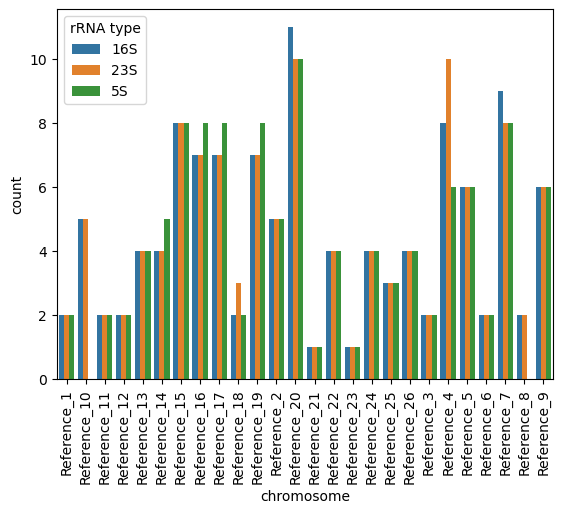

In [35]:
# Creating barplot
fig = plt.figure()
sns.barplot(x='chromosome', y='count', hue='attributes', data=rrnas_by_types)
plt.legend(title='rRNA type', loc='upper left')
plt.xlabel('chromosome', size=10)
plt.ylabel('count', size=10)
plt.xticks(rotation=90, size=10);

In [36]:
# Extracting rRNAs which intersect with alignment
rrnas_align_intersect = merged_df[(merged_df['start_x'] >= merged_df['start_y']) & (merged_df['end_x'] <= merged_df['end_y'])]
rrnas_align_intersect.drop_duplicates()

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+
